In [1]:
import torch
from torchvision import datasets, transforms

transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [5]:
from torch import nn, optim
import torch.nn.functional as F
from torch import optim
from torch import nn, optim
import torch.nn.functional as F
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        self.dropout = nn.Dropout(p=0.2)
    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = F.log_softmax(self.fc3(x), dim=1)
        return x
model = Classifier()
criterion = nn.NLLLoss()

In [6]:
optimizer = optim.SGD(model.parameters(), lr=0.01)
epochs = 30
steps = 0
train_losses, test_losses = [], []
for i in range(0,epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0],784)
        
        
        #Forward pass
        logps = model.forward(images)
        #calculate loss
        loss = criterion(logps, labels)
        #gradients
        optimizer.zero_grad()
        loss.backward()
        #updating
        optimizer.step()
        
        
        running_loss += loss.item()
    else:
        test_loss=0
        accuracy=0
        with torch.no_grad():
            #to tun-off dropout
            model.eval()
            for images, labels in testloader:
                images = images.view(images.shape[0],784)
                logps = model.forward(images)
                test_loss+=criterion(logps, labels)
                ps = F.softmax(logps,dim=1)
                top_p, top_class = ps.topk(1, dim=1)
                equals = (top_class == labels.view(*top_class.shape))
                accuracy += torch.mean(equals.type(torch.FloatTensor))
        #to turn-on dropout
        model.train()
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))
        print(f"Training loss: {running_loss/len(trainloader)}")
        print(f"Testing loss: {test_loss/len(testloader)}")
        print(f"Testing Accuracy: {accuracy/len(testloader)}")
        print("--------------------")

Training loss: 1.151383075060875
Testing loss: 0.6680939793586731
Testing Accuracy: 0.7537818551063538
--------------------
Training loss: 0.6667432660169439
Testing loss: 0.5687260031700134
Testing Accuracy: 0.7884156107902527
--------------------
Training loss: 0.5791843519536163
Testing loss: 0.5157654881477356
Testing Accuracy: 0.8071258068084717
--------------------
Training loss: 0.5315714517890263
Testing loss: 0.4888201057910919
Testing Accuracy: 0.8208598494529724
--------------------
Training loss: 0.49879152777352564
Testing loss: 0.46255356073379517
Testing Accuracy: 0.8304139971733093
--------------------
Training loss: 0.4742189727421763
Testing loss: 0.451509565114975
Testing Accuracy: 0.8355891704559326
--------------------
Training loss: 0.4588242899983931
Testing loss: 0.436122864484787
Testing Accuracy: 0.840664803981781
--------------------
Training loss: 0.44284632468401497
Testing loss: 0.42715901136398315
Testing Accuracy: 0.8433519005775452
--------------------


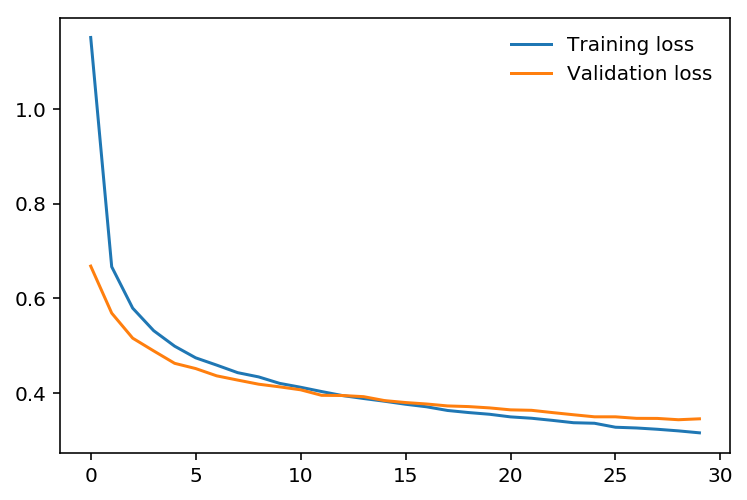

In [7]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)